In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model = 'deepseek-r1-distill-llama-70b'
)

llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000198918CD820>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019891B71E50>, model_name='deepseek-r1-distill-llama-70b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [73]:
## Great LLM
from langchain_anthropic.chat_models import ChatAnthropic

llm = ChatAnthropic(model="claude-3-5-sonnet-latest")
llm

ChatAnthropic(model='claude-3-5-sonnet-latest', anthropic_api_url='https://api.anthropic.com', anthropic_api_key=SecretStr('**********'), model_kwargs={})

In [74]:
print(llm.invoke("hi, how are you?").content)

Hi! I'm doing well, thanks for asking. I'm ready to help you with any questions or tasks you might have. How are you?


In [75]:
print(llm.invoke("How is the today's weather in Kolkata, India?").content)

I am not able to provide real-time weather information for Kolkata or any other location. I don't have access to current weather data. To get accurate, up-to-date weather information for Kolkata, I recommend:

1. Checking a weather website or app
2. Looking up the Indian Meteorological Department's website
3. Using a local weather service
4. Checking local news websites


In [76]:
import operator
from typing import List
from langgraph.graph.message import add_messages
from pydantic import BaseModel , Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode

In [77]:
msg = MessagesState()
print(type(msg))

<class 'dict'>


In [7]:
def call_llm(state: MessagesState) -> dict:
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [8]:
messages = [HumanMessage(content="""
                        What is NATO, and when was it formed? Does NATO still hold strategic significance even after the collapse of the USSR and 
                        considering Russia's relatively weaker economy compared to the U.S. and Europe? Some argue that NATO now serves more as a 
                        display of Western power and may even pose a threat to global peace. What are your thoughts on this perspective — especially given 
                        the unpredictability of nations that feel cornered or powerless? You probably know who I'm referring to.
                        """)]

state: MessagesState = {"messages": messages}
print(type(state))

response = call_llm(state)

<class 'dict'>


In [9]:
print(response['messages'][0].content)

<think>
Okay, so I'm trying to understand what NATO is and why it's still around after the USSR collapsed. I know NATO stands for North Atlantic Treaty Organization, but I'm not exactly sure when it was formed. I think it was after World War II, maybe in the late 1940s? It was probably created to counter the Soviet Union during the Cold War. 

Now, the user is asking if NATO is still strategically significant even after the USSR fell apart. That makes sense because the main enemy they were against, the Soviet Union, doesn't exist anymore. But then, why is NATO still active? Maybe because even though the USSR is gone, Russia is still a big player and might be seen as a threat. Plus, there are other global issues like terrorism or instability in certain regions that NATO might address.

I've heard some people say that NATO now just shows Western power and could actually make things worse by threatening global peace. They might feel that by expanding and having a strong military presence,

In [10]:
state = {"messages":["hi hello how are you?"]}
response = call_llm(state)

In [11]:
print(response['messages'][0].content)

<think>

</think>

Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊


In [78]:
from langchain_core.tools import tool
import requests

@tool
def get_weather(city: str) -> str:
    """Get current weather for a city."""
    
    api_key = os.getenv("OPENWEATHER_API_KEY")
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    
    if response.status_code != 200:
        return f"Failed to get weather: {response.text}"
    
    data = response.json()
    print(data)
    
    temp = data["main"]["temp"]
    desc = data["weather"][0]["description"]
    
    return f"The weather in {city} is {desc} with a temperature of {temp}°C."


In [13]:
get_weather.description

'Get current weather for a city.'

In [14]:
get_weather.args

{'city': {'title': 'City', 'type': 'string'}}

In [15]:
get_weather.invoke("bangalore")

{'coord': {'lon': 77.6033, 'lat': 12.9762}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.36, 'feels_like': 30.66, 'temp_min': 28.36, 'temp_max': 28.36, 'pressure': 1008, 'humidity': 65, 'sea_level': 1008, 'grnd_level': 910}, 'visibility': 10000, 'wind': {'speed': 8.87, 'deg': 259, 'gust': 13.07}, 'clouds': {'all': 100}, 'dt': 1750940713, 'sys': {'country': 'IN', 'sunrise': 1750897544, 'sunset': 1750943934}, 'timezone': 19800, 'id': 1277333, 'name': 'Bengaluru', 'cod': 200}


'The weather in bangalore is overcast clouds with a temperature of 28.36°C.'

{'coord': {'lon': 77.6033, 'lat': 12.9762}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.36, 'feels_like': 30.66, 'temp_min': 28.36, 'temp_max': 28.36, 'pressure': 1008, 'humidity': 65, 'sea_level': 1008, 'grnd_level': 910}, 'visibility': 10000, 'wind': {'speed': 8.87, 'deg': 259, 'gust': 13.07}, 'clouds': {'all': 100}, 'dt': 1750940713, 'sys': {'country': 'IN', 'sunrise': 1750897544, 'sunset': 1750943934}, 'timezone': 19800, 'id': 1277333, 'name': 'Bengaluru', 'cod': 200}


In [16]:
get_weather.invoke("kolkata")

{'coord': {'lon': 88.3697, 'lat': 22.5697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.28, 'feels_like': 36.52, 'temp_min': 30.28, 'temp_max': 30.28, 'pressure': 999, 'humidity': 73, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 4.72, 'deg': 166, 'gust': 6.22}, 'clouds': {'all': 96}, 'dt': 1750940502, 'sys': {'country': 'IN', 'sunrise': 1750893833, 'sunset': 1750942476}, 'timezone': 19800, 'id': 1275004, 'name': 'Kolkata', 'cod': 200}


'The weather in kolkata is overcast clouds with a temperature of 30.28°C.'

{'coord': {'lon': 88.3697, 'lat': 22.5697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.28, 'feels_like': 36.52, 'temp_min': 30.28, 'temp_max': 30.28, 'pressure': 999, 'humidity': 73, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 4.72, 'deg': 166, 'gust': 6.22}, 'clouds': {'all': 96}, 'dt': 1750940502, 'sys': {'country': 'IN', 'sunrise': 1750893833, 'sunset': 1750942476}, 'timezone': 19800, 'id': 1275004, 'name': 'Kolkata', 'cod': 200}


In [17]:
get_weather.invoke("moscow")

{'coord': {'lon': 37.6156, 'lat': 55.7522}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.89, 'feels_like': 18.19, 'temp_min': 18.89, 'temp_max': 18.89, 'pressure': 998, 'humidity': 52, 'sea_level': 998, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 5.98, 'deg': 315, 'gust': 7.36}, 'clouds': {'all': 94}, 'dt': 1750940147, 'sys': {'country': 'RU', 'sunrise': 1750898782, 'sunset': 1750961892}, 'timezone': 10800, 'id': 524901, 'name': 'Moscow', 'cod': 200}


'The weather in moscow is overcast clouds with a temperature of 18.89°C.'

{'coord': {'lon': 37.6156, 'lat': 55.7522}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.89, 'feels_like': 18.19, 'temp_min': 18.89, 'temp_max': 18.89, 'pressure': 998, 'humidity': 52, 'sea_level': 998, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 5.98, 'deg': 315, 'gust': 7.36}, 'clouds': {'all': 94}, 'dt': 1750940147, 'sys': {'country': 'RU', 'sunrise': 1750898782, 'sunset': 1750961892}, 'timezone': 10800, 'id': 524901, 'name': 'Moscow', 'cod': 200}


#### **LLM with Tool Bind**

In [79]:
## tools
tools = [get_weather]

In [80]:

llm_with_tools = llm.bind_tools(tools)
llm_with_tools

RunnableBinding(bound=ChatAnthropic(model='claude-3-5-sonnet-latest', anthropic_api_url='https://api.anthropic.com', anthropic_api_key=SecretStr('**********'), model_kwargs={}), kwargs={'tools': [{'name': 'get_weather', 'input_schema': {'properties': {'city': {'type': 'string'}}, 'required': ['city'], 'type': 'object'}, 'description': 'Get current weather for a city.'}]}, config={}, config_factories=[])

In [20]:
response = llm_with_tools.invoke("how is the weather in Delhi now?")
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '9qyycg85p', 'function': {'arguments': '{"city":"Delhi"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 131, 'total_tokens': 222, 'completion_time': 0.432082933, 'prompt_time': 0.014632866, 'queue_time': 0.05332, 'total_time': 0.446715799}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5e1b5c4c-6d50-42b5-ad89-e65d16af23ff-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Delhi'}, 'id': '9qyycg85p', 'type': 'tool_call'}], usage_metadata={'input_tokens': 131, 'output_tokens': 91, 'total_tokens': 222})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '9qyycg85p', 'function': {'arguments': '{"city":"Delhi"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 131, 'total_tokens': 222, 'completion_time': 0.432082933, 'prompt_time': 0.014632866, 'queue_time': 0.05332, 'total_time': 0.446715799}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5e1b5c4c-6d50-42b5-ad89-e65d16af23ff-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Delhi'}, 'id': '9qyycg85p', 'type': 'tool_call'}], usage_metadata={'input_tokens': 131, 'output_tokens': 91, 'total_tokens': 222})

In [21]:
response.tool_calls

[{'name': 'get_weather',
  'args': {'city': 'Delhi'},
  'id': '9qyycg85p',
  'type': 'tool_call'}]

In [81]:
def call_llm_with_tool_bind(state:MessagesState) -> dict:
    question = state["messages"]
    response = llm_with_tools.invoke(question)
    return {"messages":[response]}

In [23]:
messages = [HumanMessage(content="how is the weather in Delhi now?")]

state: MessagesState = {"messages": messages}
print(type(state))

response = call_llm_with_tool_bind(state)
print(response)

<class 'dict'>
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'pdebq5bxr', 'function': {'arguments': '{"city":"Delhi"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 131, 'total_tokens': 221, 'completion_time': 0.435419084, 'prompt_time': 0.008668366, 'queue_time': 0.055750461, 'total_time': 0.44408745}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--50a8690e-400b-4b7b-b34f-93da80835d77-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Delhi'}, 'id': 'pdebq5bxr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 131, 'output_tokens': 90, 'total_tokens': 221})]}


In [24]:
response["messages"][-1].content

''

In [25]:
response["messages"][-1].tool_calls

[{'name': 'get_weather',
  'args': {'city': 'Delhi'},
  'id': 'pdebq5bxr',
  'type': 'tool_call'}]

In [82]:
## router function

def router_function(state:MessagesState):
    message = state["messages"]
    last_message = message[-1]
    
    if last_message.tool_calls:
        return "tools"
    
    return END

In [27]:
tools

[StructuredTool(name='get_weather', description='Get current weather for a city.', args_schema=<class 'langchain_core.utils.pydantic.get_weather'>, func=<function get_weather at 0x000001989A7BD9E0>)]

In [83]:
tool_node = ToolNode(tools)
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'get_weather': StructuredTool(name='get_weather', description='Get current weather for a city.', args_schema=<class 'langchain_core.utils.pydantic.get_weather'>, func=<function get_weather at 0x00000198B1334180>)}, tool_to_state_args={'get_weather': {}}, tool_to_store_arg={'get_weather': None}, handle_tool_errors=True, messages_key='messages')

In [84]:
workflow = StateGraph(MessagesState)
workflow

In [85]:
workflow.add_node("llm_with_tools", call_llm_with_tool_bind)

workflow.add_node("my_tools", tool_node)

workflow.add_edge(START,"llm_with_tools")

workflow.add_conditional_edges(
    "llm_with_tools",
    router_function,
    {
        "tools":"my_tools",
        END:END
    }
)

workflow.add_edge("my_tools","llm_with_tools")

In [86]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

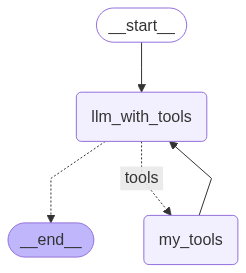

In [87]:
app = workflow.compile(checkpointer=memory)
app

In [88]:
config = {
    "configurable": {
        "thread_id": "1"
    }
}

In [57]:
messages = [HumanMessage(content="I'm planning a trip to Delhi. Can you suggest some must-visit historical places there, and also let me know the current weather in Delhi?")]

state: MessagesState = {"messages": messages}
print(type(state))

response = app.invoke(state, config=config)
print(response)

<class 'dict'>
{'coord': {'lon': 77.2167, 'lat': 28.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.37, 'feels_like': 41.86, 'temp_min': 36.37, 'temp_max': 36.37, 'pressure': 998, 'humidity': 45, 'sea_level': 998, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 4.75, 'deg': 90, 'gust': 4.83}, 'clouds': {'all': 100}, 'dt': 1750943113, 'sys': {'country': 'IN', 'sunrise': 1750895698, 'sunset': 1750945965}, 'timezone': 19800, 'id': 1273294, 'name': 'Delhi', 'cod': 200}
{'messages': [HumanMessage(content="I'm planning a trip to Delhi. Can you suggest some must-visit historical places there, and also let me know the current weather in Delhi?", additional_kwargs={}, response_metadata={}, id='cffc17c4-3d58-41fc-a54c-a0791a9b785b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 's5zrwkyfb', 'function': {'arguments': '{"city":"Delhi"}', 'name': 'get_weather'}, 'type': 'function

{'messages': [HumanMessage(content="I'm planning a trip to Delhi. Can you suggest some must-visit historical places there, and also let me know the current weather in Delhi?", additional_kwargs={}, response_metadata={}, id='cffc17c4-3d58-41fc-a54c-a0791a9b785b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 's5zrwkyfb', 'function': {'arguments': '{"city":"Delhi"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 472, 'prompt_tokens': 153, 'total_tokens': 625, 'completion_time': 2.012133367, 'prompt_time': 0.010711236, 'queue_time': 0.067038063, 'total_time': 2.022844603}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--216e801a-0ade-4cb5-9477-4ce5200dfc5c-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Delhi'}, 'id': 's5zrwkyfb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 153, 'output_tokens': 472, 'total_tokens': 625}), ToolMessage(content='The weather in Delhi is overcast clouds with a temperature of 36.37°C.', name='get_weather', id='b2703d0b-748e-459d-8626-a7afcf47588b', tool_call_id='s5zrwkyfb'), AIMessage(content="Here are some must-visit historical places in Delhi:\n\n1. **Red Fort (Lal Qila)**: A magnificent red sandstone fort that served as the main residence of the Mughal emperors for nearly 200 years.\n\n2. **Qutub Minar**: The tallest minaret in India and a UNESCO World Heritage Site, built in 1192 by Qutb-ud-din Aibak.\n\n3. **Humayun's Tomb**: The tomb of Mughal Emperor Humayun, known for its stunning architecture and beautiful gardens.\n\n4. **India Gate**: A war memorial dedicated to the soldiers who died in World War I and the Third Anglo-Afghan War.\n\n5. **Jama Masjid**: One of the largest mosques in India, built by Shah Jahan in 1656.\n\n6. **Purana Qila**: A historic fort that dates back to the 16th century, believed to be the site of the ancient city of Indraprastha.\n\n7. **Tughlaqabad Fort**: A massive fortress built by Ghiyas-ud-din Tughlaq in the 14th century, known for its impressive architecture and history.\n\nThese are some of the must-visit historical places in Delhi that showcase the rich history and cultural heritage of the city.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 534, 'prompt_tokens': 220, 'total_tokens': 754, 'completion_time': 1.941818182, 'prompt_time': 0.021215366, 'queue_time': 0.056001994, 'total_time': 1.9630335479999999}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--4cf07906-3594-4756-ac6d-88a19964e0f8-0', usage_metadata={'input_tokens': 220, 'output_tokens': 534, 'total_tokens': 754}), HumanMessage(content="I'm planning a trip to Delhi. Can you suggest some must-visit historical places there, and also let me know the current weather in Delhi?", additional_kwargs={}, response_metadata={}, id='5431e007-c3de-4f27-ae7a-eb2b9ff2eeae'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'z65edfyy4', 'function': {'arguments': '{"city":"Delhi"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 259, 'prompt_tokens': 527, 'total_tokens': 786, 'completion_time': 1.534559521, 'prompt_time': 0.04280452, 'queue_time': 0.055461720000000006, 'total_time': 1.577364041}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--eaacd761-ac74-4eb6-a43f-ca7bd3674bf5-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Delhi'}, 'id': 'z65edfyy4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 527, 'output_tokens': 259, 'total_tokens': 786}), ToolMessage(content='The weather in Delhi is overcast clouds with a temperature of 36.37°C.', name='get_weather', id='119db054-7975-4dea-a1ff-d52e3e830848', tool_call_id='z65edfyy4'), AIMessage(content="Here are some must-visit historical places in Delhi:\n\n1. **Red Fort (Lal Qila)**: A magnificent red sandstone fort that served as the main residence of the Mughal emperors for nearly 200 years.\n\n2. **Qutub Minar**: The tallest minaret in India and a UNESCO World Heritage Site, built in 1192 by Qutb-ud-din Aibak.\n\n3. **Humayun's Tomb**: The tomb of Mughal Emperor Humayun, known for its stunning architecture and beautiful gardens.\n\n4. **India Gate**: A war memorial dedicated to the soldiers who died in World War I and the Third Anglo-Afghan War.\n\n5. **Jama Masjid**: One of the largest mosques in India, built by Shah Jahan in 1656.\n\n6. **Purana Qila**: A historic fort that dates back to the 16th century, believed to be the site of the ancient city of Indraprastha.\n\n7. **Tughlaqabad Fort**: A massive fortress built by Ghiyas-ud-din Tughlaq in the 14th century, known for its impressive architecture and history.\n\nThe weather in Delhi is overcast clouds with a temperature of 36.37°C.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 378, 'prompt_tokens': 594, 'total_tokens': 972, 'completion_time': 1.374545455, 'prompt_time': 0.04672963, 'queue_time': 0.053413140000000005, 'total_time': 1.421275085}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--d1fbaa90-8376-47fa-ac36-4b147d2fa517-0', usage_metadata={'input_tokens': 594, 'output_tokens': 378, 'total_tokens': 972})]}


In [58]:

print(response["messages"][-1].content)

Here are some must-visit historical places in Delhi:

1. **Red Fort (Lal Qila)**: A magnificent red sandstone fort that served as the main residence of the Mughal emperors for nearly 200 years.

2. **Qutub Minar**: The tallest minaret in India and a UNESCO World Heritage Site, built in 1192 by Qutb-ud-din Aibak.

3. **Humayun's Tomb**: The tomb of Mughal Emperor Humayun, known for its stunning architecture and beautiful gardens.

4. **India Gate**: A war memorial dedicated to the soldiers who died in World War I and the Third Anglo-Afghan War.

5. **Jama Masjid**: One of the largest mosques in India, built by Shah Jahan in 1656.

6. **Purana Qila**: A historic fort that dates back to the 16th century, believed to be the site of the ancient city of Indraprastha.

7. **Tughlaqabad Fort**: A massive fortress built by Ghiyas-ud-din Tughlaq in the 14th century, known for its impressive architecture and history.

The weather in Delhi is overcast clouds with a temperature of 36.37°C.


In [59]:
messages = [HumanMessage(content="what are some differences between fine-tuning and pre-training of LLMs?")]

state: MessagesState = {"messages": messages}
print(type(state))

response = app.invoke(state, config=config)
print(response)

<class 'dict'>
{'messages': [HumanMessage(content="I'm planning a trip to Delhi. Can you suggest some must-visit historical places there, and also let me know the current weather in Delhi?", additional_kwargs={}, response_metadata={}, id='cffc17c4-3d58-41fc-a54c-a0791a9b785b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 's5zrwkyfb', 'function': {'arguments': '{"city":"Delhi"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 472, 'prompt_tokens': 153, 'total_tokens': 625, 'completion_time': 2.012133367, 'prompt_time': 0.010711236, 'queue_time': 0.067038063, 'total_time': 2.022844603}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--216e801a-0ade-4cb5-9477-4ce5200dfc5c-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Delhi'}, 'id': 's5zrwkyfb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 153, 'outp

{'messages': [HumanMessage(content="I'm planning a trip to Delhi. Can you suggest some must-visit historical places there, and also let me know the current weather in Delhi?", additional_kwargs={}, response_metadata={}, id='cffc17c4-3d58-41fc-a54c-a0791a9b785b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 's5zrwkyfb', 'function': {'arguments': '{"city":"Delhi"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 472, 'prompt_tokens': 153, 'total_tokens': 625, 'completion_time': 2.012133367, 'prompt_time': 0.010711236, 'queue_time': 0.067038063, 'total_time': 2.022844603}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--216e801a-0ade-4cb5-9477-4ce5200dfc5c-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Delhi'}, 'id': 's5zrwkyfb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 153, 'output_tokens': 472, 'total_tokens': 625}), ToolMessage(content='The weather in Delhi is overcast clouds with a temperature of 36.37°C.', name='get_weather', id='b2703d0b-748e-459d-8626-a7afcf47588b', tool_call_id='s5zrwkyfb'), AIMessage(content="Here are some must-visit historical places in Delhi:\n\n1. **Red Fort (Lal Qila)**: A magnificent red sandstone fort that served as the main residence of the Mughal emperors for nearly 200 years.\n\n2. **Qutub Minar**: The tallest minaret in India and a UNESCO World Heritage Site, built in 1192 by Qutb-ud-din Aibak.\n\n3. **Humayun's Tomb**: The tomb of Mughal Emperor Humayun, known for its stunning architecture and beautiful gardens.\n\n4. **India Gate**: A war memorial dedicated to the soldiers who died in World War I and the Third Anglo-Afghan War.\n\n5. **Jama Masjid**: One of the largest mosques in India, built by Shah Jahan in 1656.\n\n6. **Purana Qila**: A historic fort that dates back to the 16th century, believed to be the site of the ancient city of Indraprastha.\n\n7. **Tughlaqabad Fort**: A massive fortress built by Ghiyas-ud-din Tughlaq in the 14th century, known for its impressive architecture and history.\n\nThese are some of the must-visit historical places in Delhi that showcase the rich history and cultural heritage of the city.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 534, 'prompt_tokens': 220, 'total_tokens': 754, 'completion_time': 1.941818182, 'prompt_time': 0.021215366, 'queue_time': 0.056001994, 'total_time': 1.9630335479999999}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--4cf07906-3594-4756-ac6d-88a19964e0f8-0', usage_metadata={'input_tokens': 220, 'output_tokens': 534, 'total_tokens': 754}), HumanMessage(content="I'm planning a trip to Delhi. Can you suggest some must-visit historical places there, and also let me know the current weather in Delhi?", additional_kwargs={}, response_metadata={}, id='5431e007-c3de-4f27-ae7a-eb2b9ff2eeae'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'z65edfyy4', 'function': {'arguments': '{"city":"Delhi"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 259, 'prompt_tokens': 527, 'total_tokens': 786, 'completion_time': 1.534559521, 'prompt_time': 0.04280452, 'queue_time': 0.055461720000000006, 'total_time': 1.577364041}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--eaacd761-ac74-4eb6-a43f-ca7bd3674bf5-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Delhi'}, 'id': 'z65edfyy4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 527, 'output_tokens': 259, 'total_tokens': 786}), ToolMessage(content='The weather in Delhi is overcast clouds with a temperature of 36.37°C.', name='get_weather', id='119db054-7975-4dea-a1ff-d52e3e830848', tool_call_id='z65edfyy4'), AIMessage(content="Here are some must-visit historical places in Delhi:\n\n1. **Red Fort (Lal Qila)**: A magnificent red sandstone fort that served as the main residence of the Mughal emperors for nearly 200 years.\n\n2. **Qutub Minar**: The tallest minaret in India and a UNESCO World Heritage Site, built in 1192 by Qutb-ud-din Aibak.\n\n3. **Humayun's Tomb**: The tomb of Mughal Emperor Humayun, known for its stunning architecture and beautiful gardens.\n\n4. **India Gate**: A war memorial dedicated to the soldiers who died in World War I and the Third Anglo-Afghan War.\n\n5. **Jama Masjid**: One of the largest mosques in India, built by Shah Jahan in 1656.\n\n6. **Purana Qila**: A historic fort that dates back to the 16th century, believed to be the site of the ancient city of Indraprastha.\n\n7. **Tughlaqabad Fort**: A massive fortress built by Ghiyas-ud-din Tughlaq in the 14th century, known for its impressive architecture and history.\n\nThe weather in Delhi is overcast clouds with a temperature of 36.37°C.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 378, 'prompt_tokens': 594, 'total_tokens': 972, 'completion_time': 1.374545455, 'prompt_time': 0.04672963, 'queue_time': 0.053413140000000005, 'total_time': 1.421275085}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--d1fbaa90-8376-47fa-ac36-4b147d2fa517-0', usage_metadata={'input_tokens': 594, 'output_tokens': 378, 'total_tokens': 972}), HumanMessage(content='what are some differences between fine-tuning and pre-training of LLMs?', additional_kwargs={}, response_metadata={}, id='5da91aa6-6c51-4a1e-86ba-25e31a5904d7'), AIMessage(content="Fine-tuning and pre-training are two distinct phases in the development and adaptation of Large Language Models (LLMs). Here's a detailed comparison of the two:\n\n1. **Objective:**\n   - **Pre-training:** The primary goal is to train the model on a vast and diverse dataset to learn general language patterns, grammar, and vocabulary. This phase is about establishing a broad understanding of language.\n   - **Fine-tuning:** The objective here is to adapt the pre-trained model to perform specific tasks or excel in particular domains. It involves tailoring the model to meet the requirements of a specific application.\n\n2. **Data Usage:**\n   - **Pre-training:** Utilizes massive, diverse datasets, including books, web pages, and other extensive text sources, to expose the model to a wide range of language patterns.\n   - **Fine-tuning:** Employs specialized, often smaller datasets that are relevant to the target application, such as medical texts for a healthcare application or legal documents for legal advice.\n\n3. **Resource Requirements:**\n   - **Pre-training:** Requires significant computational resources due to the large size of the model and the extensive datasets used. It is typically a one-time, high-cost process.\n   - **Fine-tuning:** Generally less resource-intensive as it builds upon the pre-trained model, focusing on specific adjustments rather than learning from scratch.\n\n4. **Risk of Overfitting:**\n   - **Pre-training:** Focuses on generalization, reducing the risk of overfitting due to the diversity and size of the training data.\n   - **Fine-tuning:** Carries a higher risk of overfitting, especially with smaller or overly specialized datasets, as the model may become too tailored to the training data.\n\n5. **Outcomes:**\n   - **Pre-training:** Results in a model with a broad understanding of language, capable of general tasks.\n   - **Fine-tuning:** Produces a model specialized in specific tasks or domains, enhancing performance in targeted applications.\n\n6. **Depth of Learning:**\n   - **Pre-training:** Focuses on lower-level language features like syntax and semantics.\n   - **Fine-tuning:** Hones in on higher-level tasks, such as understanding domain-specific terminology and generating coherent text for particular purposes.\n\n7. **Application and Versatility:**\n   - **Pre-training:** Serves as the foundational phase, providing a versatile model applicable across various tasks.\n   - **Fine-tuning:** Allows for the adaptation of the pre-trained model to multiple specific applications, enhancing its versatility without requiring new models to be trained from scratch.\n\n8. **Performance Metrics:**\n   - **Pre-training:** Success is often measured by general language understanding metrics, such as perplexity on diverse datasets.\n   - **Fine-tuning:** Success is evaluated using task-specific metrics, such as accuracy in question-answering or coherence in text generation.\n\n9. **Real-World Applications:**\n   - **Pre-trained Models:** Serve as the foundation for various applications, providing general capabilities.\n   - **Fine-tuned Models:** Are specialized tools built upon pre-trained models, optimized for specific tasks and domains.\n\n10. **Transfer Learning:**\n    - Fine-tuning is a form of transfer learning, where knowledge gained during pre-training is applied to specific tasks, enhancing efficiency and reducing the need for training from scratch.\n\n11. **Catastrophic Forgetting:**\n    - During fine-tuning, there's a risk of the model forgetting its pre-trained knowledge. Techniques like regularization or smaller learning rates can mitigate this issue.\n\n12. **Model Interpretability:**\n    - Pre-trained models may be more interpretable due to their general nature, while fine-tuned models, especially those adapted for specific datasets, might be less transparent in their decision-making processes.\n\nIn summary, pre-training lays the groundwork for general language understanding, while fine-tuning tailors the model for specific applications, highlighting the importance of both phases in developing effective and adaptable LLMs.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 1900, 'prompt_tokens': 881, 'total_tokens': 2781, 'completion_time': 7.067105173, 'prompt_time': 0.064178755, 'queue_time': 0.09372818299999999, 'total_time': 7.131283928}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--5997c540-0733-4c58-a408-931b9cdb6d6b-0', usage_metadata={'input_tokens': 881, 'output_tokens': 1900, 'total_tokens': 2781})]}


In [60]:
print(response["messages"][-1].content)

Fine-tuning and pre-training are two distinct phases in the development and adaptation of Large Language Models (LLMs). Here's a detailed comparison of the two:

1. **Objective:**
   - **Pre-training:** The primary goal is to train the model on a vast and diverse dataset to learn general language patterns, grammar, and vocabulary. This phase is about establishing a broad understanding of language.
   - **Fine-tuning:** The objective here is to adapt the pre-trained model to perform specific tasks or excel in particular domains. It involves tailoring the model to meet the requirements of a specific application.

2. **Data Usage:**
   - **Pre-training:** Utilizes massive, diverse datasets, including books, web pages, and other extensive text sources, to expose the model to a wide range of language patterns.
   - **Fine-tuning:** Employs specialized, often smaller datasets that are relevant to the target application, such as medical texts for a healthcare application or legal documents fo

In [61]:
events = app.stream(
    {
        "messages":["I'm planning a trip to Kolkata. Can you suggest some must-visit historical places there, and also let me know the current weather in Kolkata?"]
    },
    config=config,
    stream_mode="values"
)

In [62]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm planning a trip to Kolkata. Can you suggest some must-visit historical places there, and also let me know the current weather in Kolkata?
================================== Ai Message ==================================
Tool Calls:
  get_weather (8katd1fjx)
 Call ID: 8katd1fjx
  Args:
    city: Kolkata
{'coord': {'lon': 88.3697, 'lat': 22.5697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.6, 'feels_like': 35.23, 'temp_min': 29.6, 'temp_max': 29.6, 'pressure': 1000, 'humidity': 75, 'sea_level': 1000, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 5.06, 'deg': 179, 'gust': 7.65}, 'clouds': {'all': 88}, 'dt': 1750943263, 'sys': {'country': 'IN', 'sunrise': 1750893833, 'sunset': 1750942476}, 'timezone': 19800, 'id': 1275004, 'name': 'Kolkata', 'cod': 200}
================================= Tool Message =====

In [63]:
events = app.stream(
    {
        "messages":["I'm planning a trip to Kolkata. Can you suggest some must-visit historical places there, and also let me know the current weather in City of Joy?"]
    },
    config=config,
    stream_mode="values"
)

In [64]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm planning a trip to Kolkata. Can you suggest some must-visit historical places there, and also let me know the current weather in City of Joy?
================================== Ai Message ==================================
Tool Calls:
  get_weather (srjfpfqsm)
 Call ID: srjfpfqsm
  Args:
    city: Kolkata
{'coord': {'lon': 88.3697, 'lat': 22.5697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.6, 'feels_like': 35.23, 'temp_min': 29.6, 'temp_max': 29.6, 'pressure': 1000, 'humidity': 75, 'sea_level': 1000, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 5.06, 'deg': 179, 'gust': 7.65}, 'clouds': {'all': 88}, 'dt': 1750943263, 'sys': {'country': 'IN', 'sunrise': 1750893833, 'sunset': 1750942476}, 'timezone': 19800, 'id': 1275004, 'name': 'Kolkata', 'cod': 200}
================================= Tool Message =

In [65]:
events = app.stream(
    {"messages":["in which city the current temparature is around 36 degree celcius?"]},
    config=config,
    stream_mode="values"
)

In [66]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which city the current temparature is around 36 degree celcius?
================================== Ai Message ==================================

Based on the current weather data, the city of **Delhi** has a temperature of **36.37°C**, which is close to 36 degrees Celsius.


In [68]:
events = app.stream(
    {"messages":["in which cities of India having current temperature below 25 degrees Celcius?"]},
    config=config,
    stream_mode="values"
)

In [69]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which cities of India having current temperature below 25 degrees Celcius?
================================== Ai Message ==================================

Based on typical weather patterns and without real-time data, the following cities in India are likely to have temperatures below 25 degrees Celsius:

1. **Bangalore, Karnataka**: Known for its pleasant weather, Bangalore often experiences temperatures in the mid to high 20s.

2. **Munnar, Kerala**: Located in the western ghats, Munnar enjoys a cooler climate and is likely to be below 25 degrees Celsius.

3. **Darjeeling, West Bengal**: Famous for its tea plantations and cool climate, Darjeeling typically has temperatures below 25 degrees Celsius.

4. **Shillong, Meghalaya**: Known as the "Scotland of the East," Shillong has a cool climate and temperatures often remain below 25 degrees Celsius.

5. **Manali, Himachal Pradesh**: A popular hill stati

In [ ]:
## using `claude-3-5-sonnet-latest` LLM
events = app.stream(
    {"messages":["Among the cities of Bangalore, Darjeeling, Srinagar, and Shillong, which one is currently experiencing the lowest temperature?"]},
    config=config,
    stream_mode="values"
)

In [90]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Among the cities of Bangalore, Darjeeling, Srinagar, and Shillong, which one is currently experiencing the lowest temperature?
================================== Ai Message ==================================

[{'text': "I'll help you check the current weather for all these cities and compare their temperatures. Let me get the weather data for each city.", 'type': 'text'}, {'id': 'toolu_012BFMJRPtbjGRkgLyiEuPpj', 'input': {'city': 'Bangalore'}, 'name': 'get_weather', 'type': 'tool_use'}]
Tool Calls:
  get_weather (toolu_012BFMJRPtbjGRkgLyiEuPpj)
 Call ID: toolu_012BFMJRPtbjGRkgLyiEuPpj
  Args:
    city: Bangalore
{'coord': {'lon': 77.6033, 'lat': 12.9762}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.9, 'feels_like': 28.77, 'temp_min': 26.9, 'temp_max': 26.9, 'pressure': 1009, 'humidity': 71, 'sea_level': 1009, 'grnd_le

In [91]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-26T13:37:48.674526+00:00',
 'id': '1f05292b-fe68-6ab3-8009-9f84093d8f3f',
 'channel_versions': {'__start__': '00000000000000000000000000000002.0.4591660711767134',
  'messages': '00000000000000000000000000000011.0.10151900808799807',
  'branch:to:llm_with_tools': '00000000000000000000000000000011.0.5097813725398601',
  'branch:to:my_tools': '00000000000000000000000000000010.0.43140886818833635'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000001.0.39562527977362205'},
  'llm_with_tools': {'branch:to:llm_with_tools': '00000000000000000000000000000010.0.5498903769509524'},
  'my_tools': {'branch:to:my_tools': '00000000000000000000000000000009.0.5210058744962212'}},
 'pending_sends': [],
 'channel_values': {'messages': [HumanMessage(content='Among the cities of Bangalore, Darjeeling, Srinagar, and Shillong, which one is currently experiencing the lowest temperature?', additional_kwargs={}, response_metadata={}, id='